In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow
ERROR: No matching distribution found for tensorflow


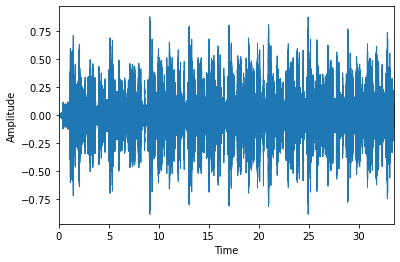

In [7]:
import librosa,librosa.display 
import matplotlib.pyplot as plt

file = "sample.wav"

# waveform 
# loading audio file
# sr = sample rate
# signal is one D array 
signal ,sr = librosa.load(file, sr = 22050) # sr*durationof sound ->(22050*30) it will have more than 600000 value

librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# fft -> spectrum
# stft -> spectogram
# MFCC

Text(0, 0.5, 'magnitude')

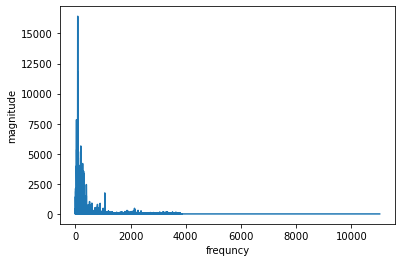

In [11]:
import numpy as np
# moving from time domain to frequency domain we will do a fourier tranform

# fft->spectrum
fft = np.fft.fft(signal)

#performing absolute value on complex value 
#contribution of each freq on overall sound
magnitude = np.abs(fft)
# linspace gives us a number of evenly spaced no in an interval
# basically a contribution of frequency 
frequency  = np.linspace(0,sr, len(magnitude))

# we are doing this as graph is syymmetrical
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
#spectrum
plt.plot(left_frequency, left_magnitude)
plt.xlabel("frequncy")
plt.ylabel("magnitude")




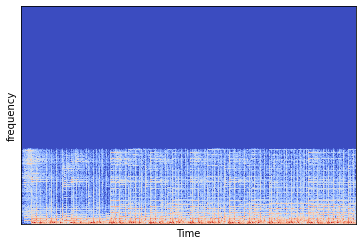

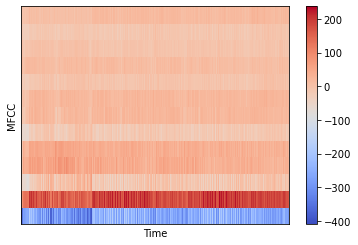

In [15]:
# above if fft spectrum 
# plot is symmetrical 
# above is static snapshot of whole sound 
# for tackling above thing we need to to STFT and get spectogram 

# no of sample per fft
# frame size 
n_fft = 2048
# amount we are shifting each fourier transform to right 
hop_length = 512

stft = librosa.core.stft(signal, hop_length= hop_length, n_fft= n_fft)
# moving to spectogram 
# complex no -> magnitude 
spectogram = np.abs(stft)

# calculating log spectogram 
# basically we decrease the scale as prevously we won't be getting the the useful representation 

log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("frequency")
plt.show()

# extracting MFCC 

 # n_mfcc = no of coefficient
MFCCs  = librosa.feature.mfcc(signal,n_fft = n_fft,hop_length= hop_length, n_mfcc =13 ) 

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()
